In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [10]:
df1=pd.read_csv('absortion.csv')
df2 = pd.read_csv('absorption.txt')
df= pd.concat([df1, df2], axis=1)
df.drop('target', axis=1, inplace=True)

In [11]:
def extract_mutation_info(name):
    matches = re.findall(r'([A-Z])(\d+)([A-Z]+)', name)
    if matches:
        origins, positions, mutations = [], [], []
        for match in matches:
            origin, position, mutation = match
            origins.append(origin)
            positions.append(int(position))
            mutations.append(mutation)
        return origins, positions, mutations
    else:
        return None, None, None
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

In [13]:
category=[]
for i in range(len(df)):
    value_check=df["peak"][i]

    if value_check>=539:
        category.append("1")
    else:
        category.append("0")
df["cat"]=category
df

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[A],0
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[G],0
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,[W],[122],[R],0
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,[V],[126],[A],0
...,...,...,...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,"[T, W]","[125, 222]","[C, M]",1
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,"[D, T, A]","[121, 125, 256]","[E, C, M]",1
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,"[T, F, A]","[125, 185, 256]","[C, T, M]",1
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,"[W, T, A]","[122, 125, 256]","[G, C, M]",0


In [19]:
df_positive=df.loc[df["cat"]=="1"]
df_negative=df.loc[df["cat"]=="0"]
df_positive=df_positive.sort_values(by="peak",ascending=True)
df_negative=df_negative.sort_values(by="peak",ascending=True)
df_negative=df_negative.reset_index(drop=True)
df_positive=df_positive.reset_index(drop=True)

In [20]:
mutation_origin=[]
for index, value in df_positive.iterrows():
    if(value["name"]!="parent"):
        if(value["m"]>1):
            j=0
            sentence=""
            for i in range(value["m"]):
                sentence+=value["name"][j]
                j+=6
            mutation_origin.append(sentence)
        else:
            mutation_origin.append(value["name"][0])
    else:
        mutation_origin.append(None)
df_positive["mo"]=mutation_origin

In [25]:
df_positive["mo"].value_counts()

mo
T       6
TA      3
D       2
TW      2
F       2
W       2
L       2
P       2
Y       1
A       1
TL      1
I       1
V       1
TWA     1
TFA     1
DTA     1
DTFA    1
Name: count, dtype: int64

In [22]:
print(df_positive .groupby('name').size())

name
A256M                      1
D121E/T125C/A256M          1
D121E/T125C/F185T/A256M    1
D253E                      1
D253T                      1
F185T                      1
F185W                      1
I159S                      1
L129K                      1
L129W                      1
P226I                      1
P226V                      1
T125C                      1
T125C/A256M                1
T125C/F185T/A256M          1
T125C/W222M                1
T125C/W222M/A256M          1
T125D                      1
T125D/A256M                1
T125D/L129W                1
T125G                      1
T125L                      1
T125N                      1
T125V                      1
T125V/A256M                1
T125V/W222M                1
V126M                      1
W222L                      1
W222M                      1
Y225A                      1
parent                     1
dtype: int64


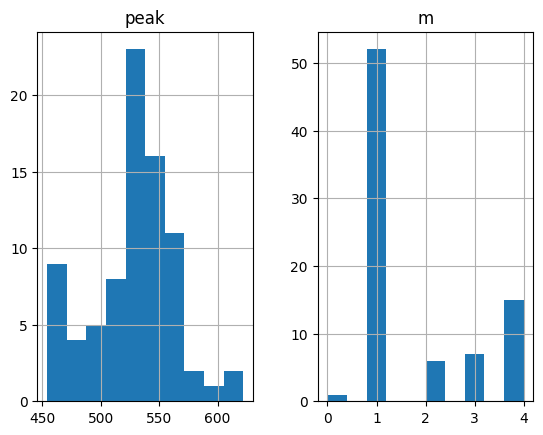

In [43]:
df.hist()
plt.show()